In [1]:


import pandas as pd
import numpy as np
import pyaf.ForecastEngine as autof
import pyaf.Bench.TS_datasets as tsds



%matplotlib inline  


In [2]:
b1 = tsds.load_airline_passengers()
df = b1.mPastData

In [3]:

lEngine = autof.cForecastEngine()
lEngine.mOptions.mDebugCycles = False
lEngine.mOptions.mModelSelection_Criterion = 'CRPS'

lEngine


In [4]:
lEngine.train(df , 'time' , 'AirPassengers' , 12)

INFO:pyaf.std:START_TRAINING 'AirPassengers'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS '['AirPassengers']' 4.008892059326172


In [5]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='time' TimeMin=1949.0 TimeMax=1956.91666666667 TimeDelta=0.08333333333336763 Horizon=12
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='AirPassengers' Length=132  Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_AirPassengers' Min=104 Max=559  Mean=262.49242424242425 StdDev=106.22114554451818
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_AirPassengers_LinearTrend_residue_zeroCycle_residue_NoAR' [LinearTrend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_AirPassengers_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_AirPassengers_LinearTrend_residue_zeroCycle_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.1088 MAPE_Forecast=0.1159 MAPE_Test=0.1279
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.1064 SMAPE_Forecast=0.1272 SMAPE_Test=0.1422

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 0.9683496952056885


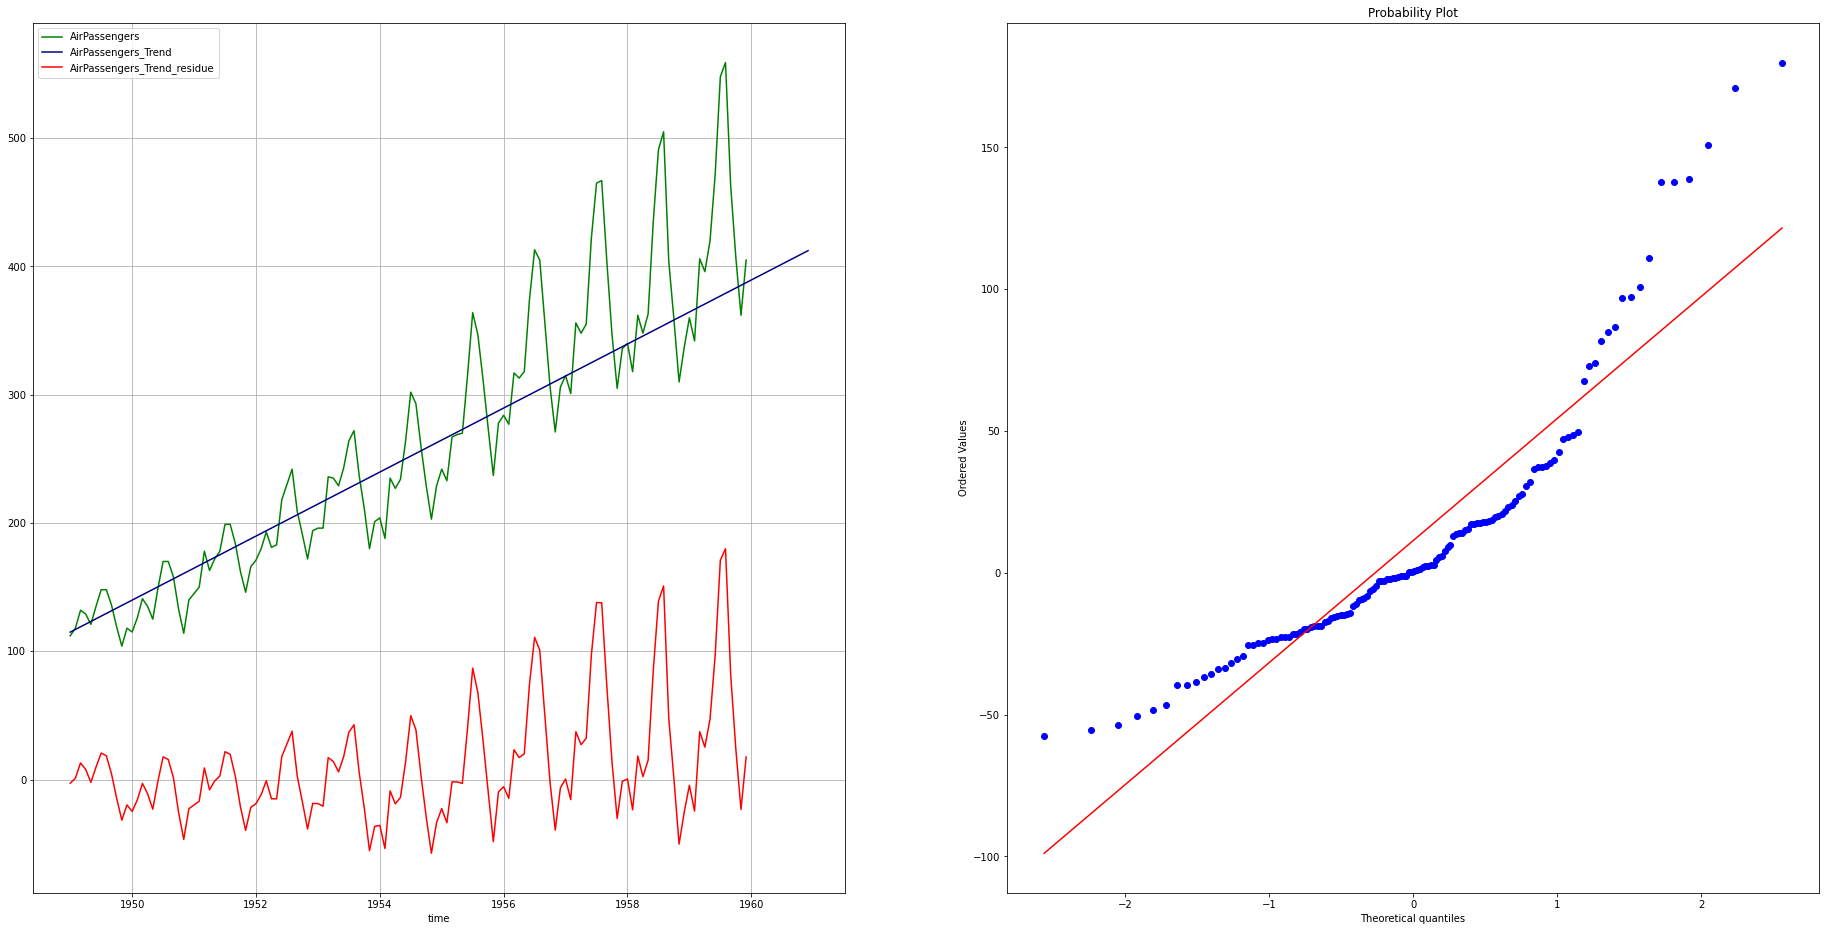

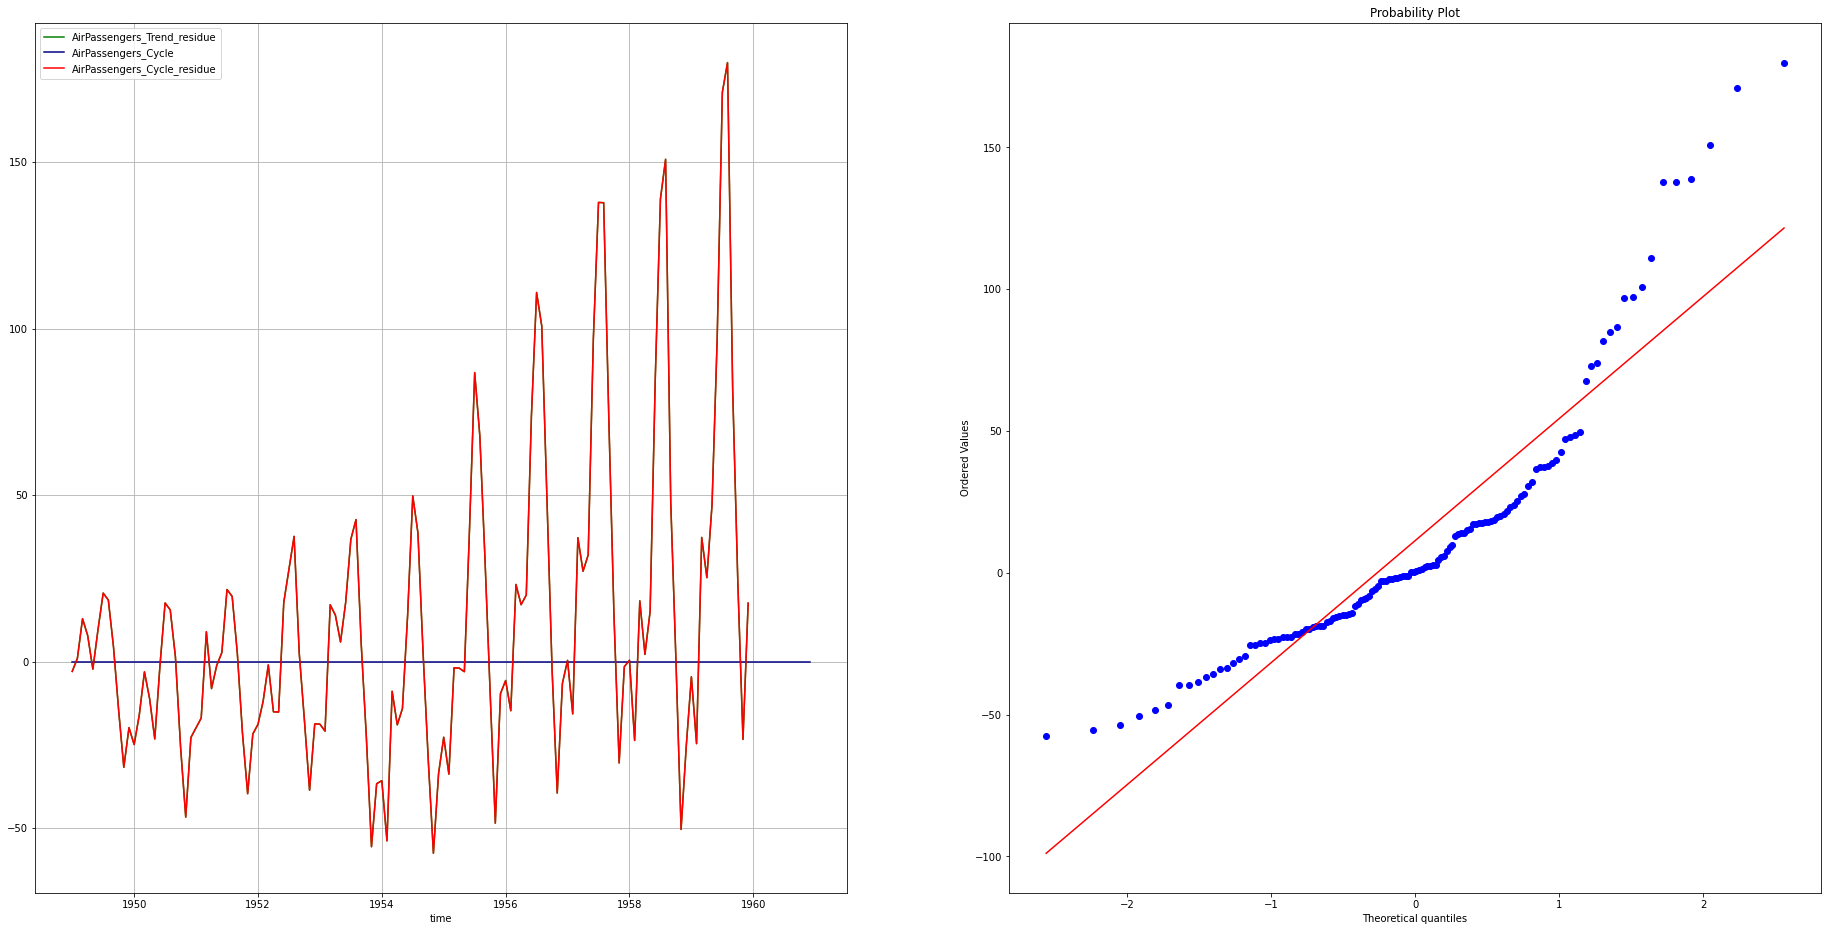

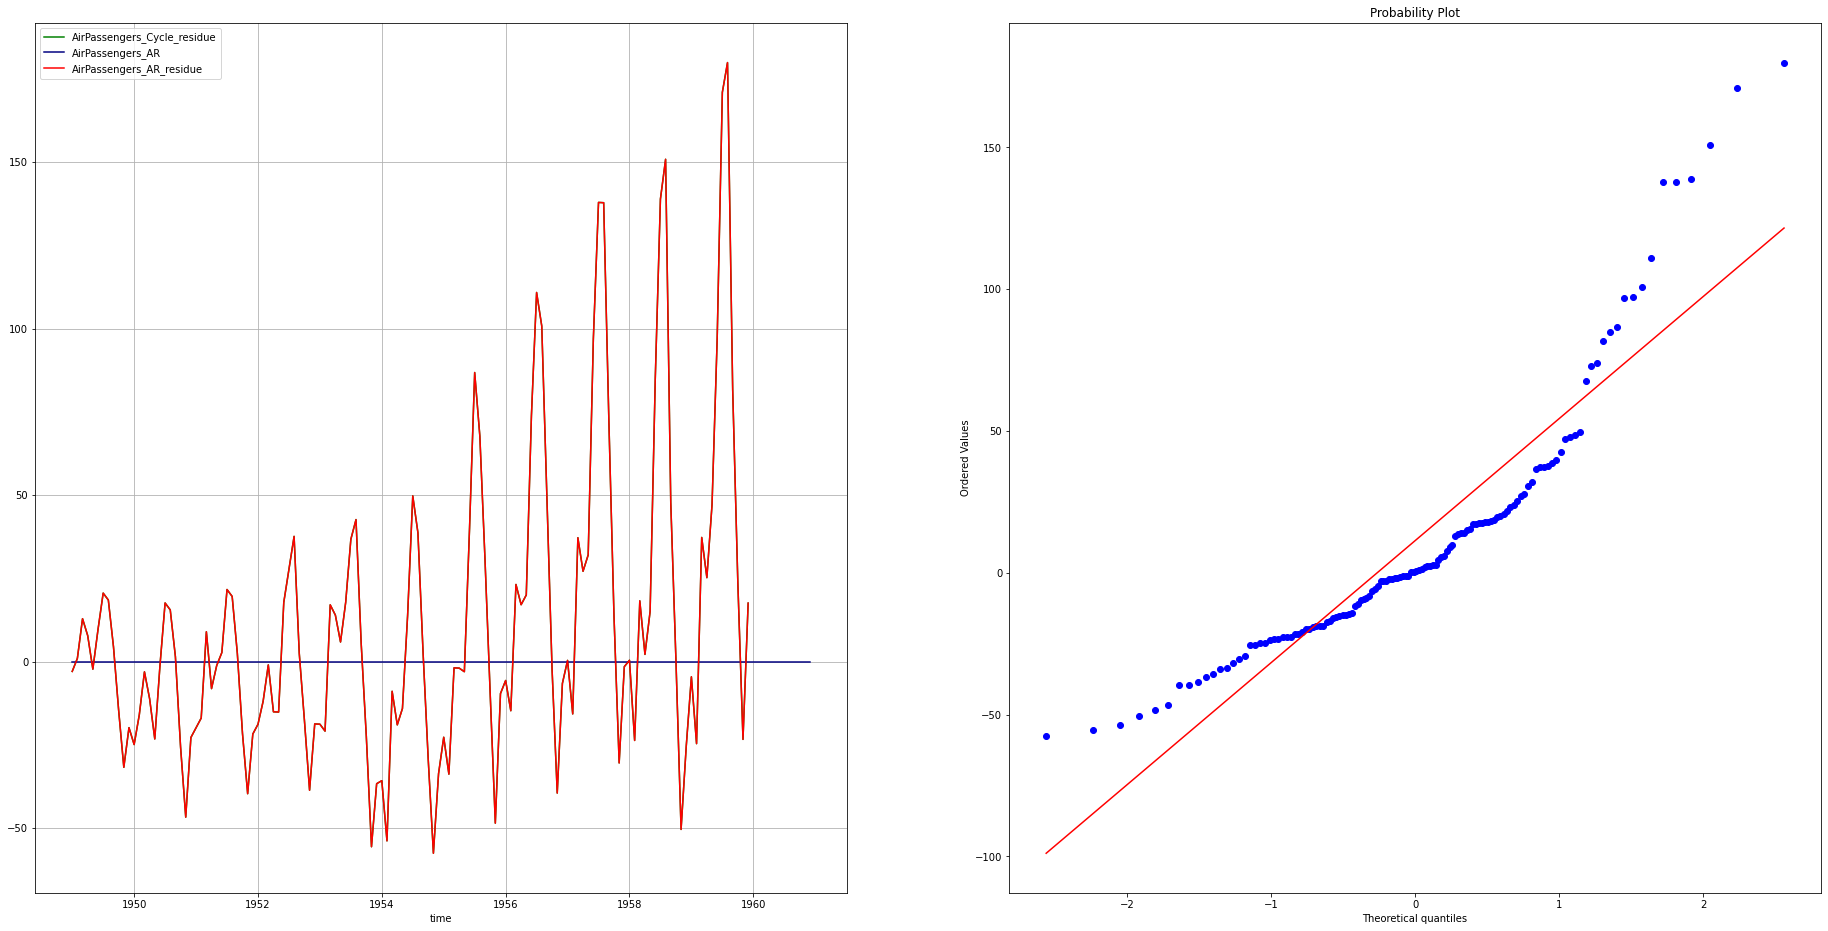

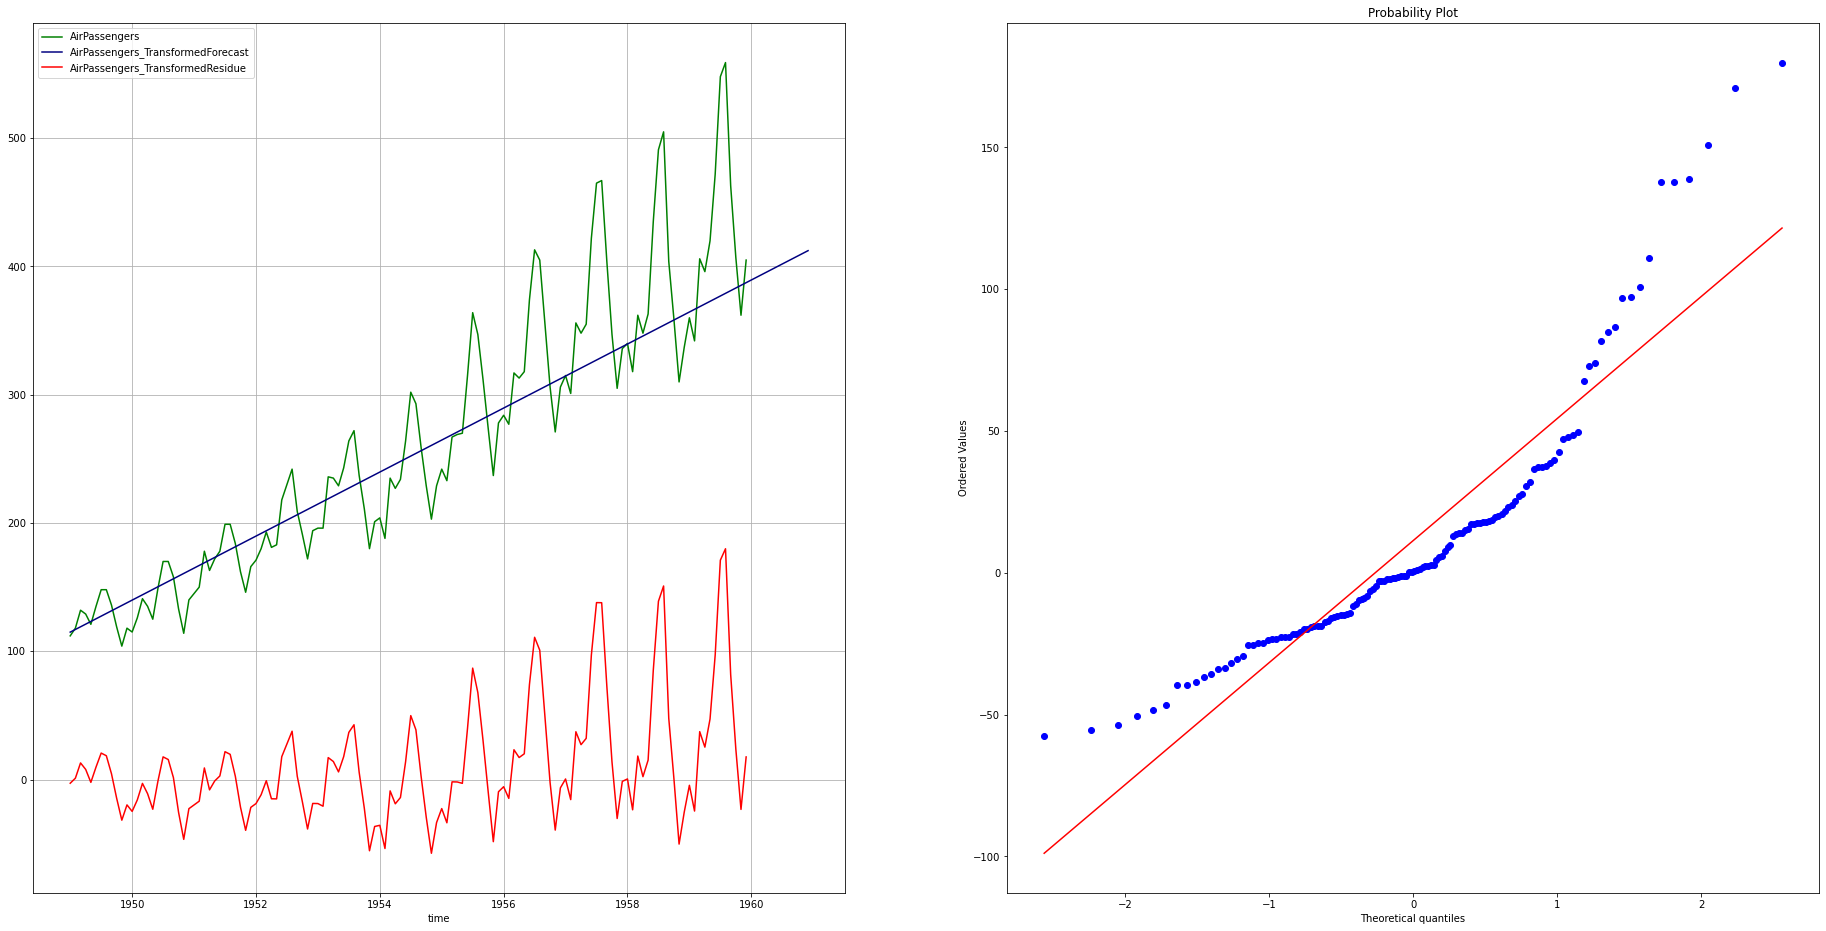

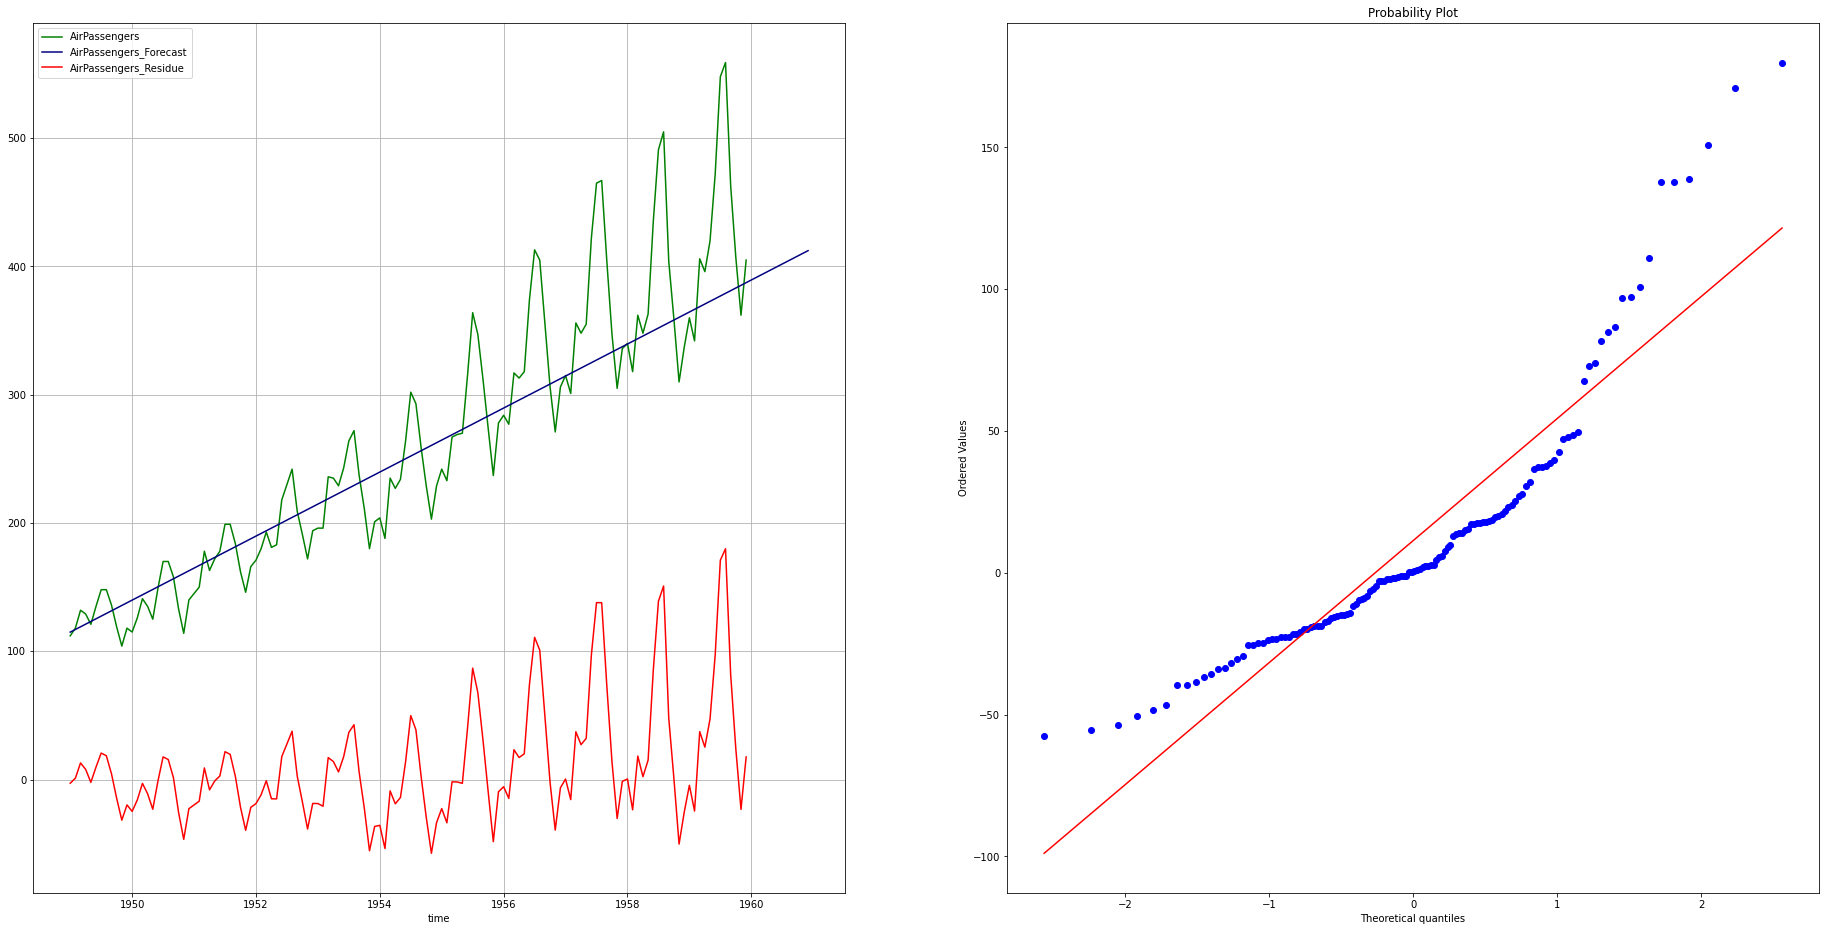

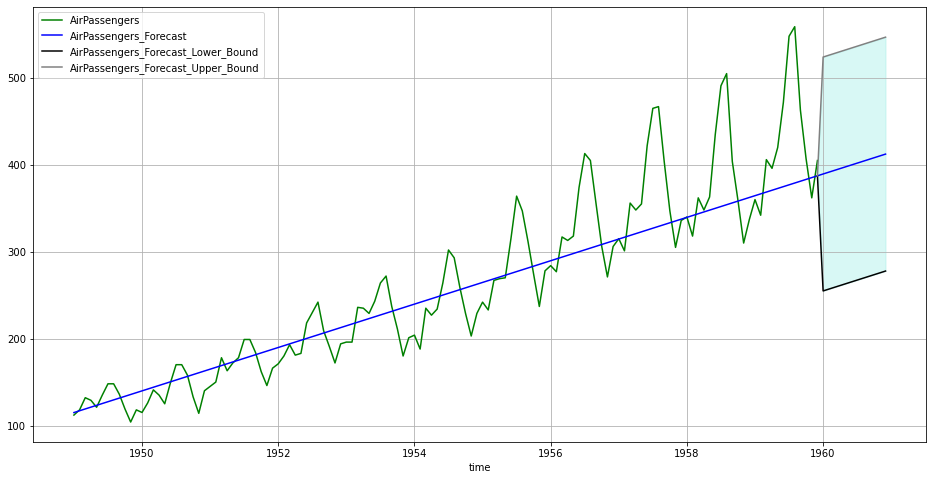

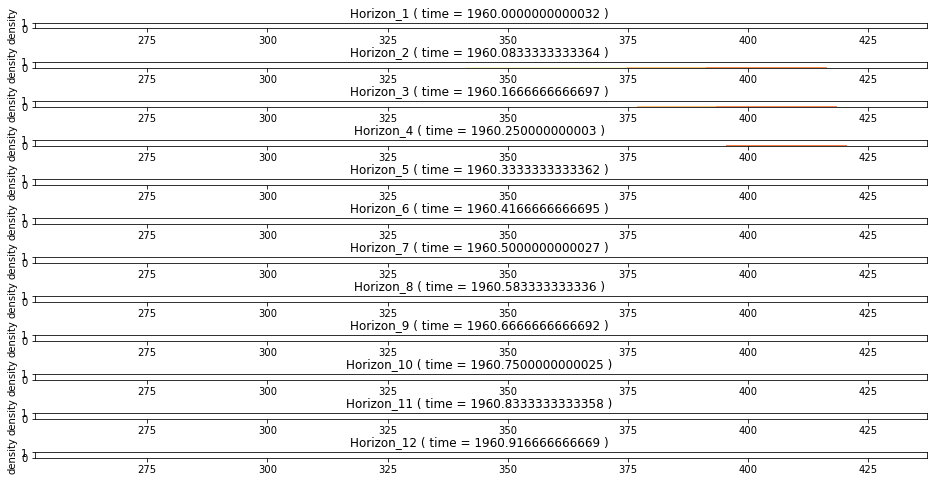

In [6]:
lEngine.standardPlots()

In [7]:
lEngine.mSignalDecomposition.mTrPerfDetails

,Split,Transformation,Model,Category,Complexity,FitCRPS,ForecastCRPS,TestCRPS
0,None,_AirPassengers,_AirPassengers_LinearTrend_residue_zeroCycle_r...,NoTransf_LinearTrend_NoCycle_NoAR,16,1.718345e+01,1.081867e+01,1.189903e+01
1,None,_AirPassengers,_AirPassengers_LinearTrend_residue_bestCycle_b...,NoTransf_LinearTrend_Cycle_None_NoAR,24,1.718345e+01,1.081867e+01,1.189903e+01
2,None,Diff_AirPassengers,Diff_AirPassengers_ConstantTrend_residue_zeroC...,Difference_ConstantTrend_NoCycle_NoAR,32,1.666904e+01,1.305729e+01,1.355189e+01
3,None,Diff_AirPassengers,Diff_AirPassengers_ConstantTrend_residue_bestC...,Difference_ConstantTrend_Cycle_None_NoAR,40,1.666904e+01,1.305729e+01,1.355189e+01
4,None,Diff_AirPassengers,Diff_AirPassengers_LinearTrend_residue_zeroCyc...,Difference_LinearTrend_NoCycle_NoAR,48,1.675171e+01,1.397806e+01,1.595494e+01
...,...,...,...,...,...,...,...,...
59,None,RelDiff_AirPassengers,RelDiff_AirPassengers_PolyTrend_residue_bestCy...,RelativeDifference_PolyTrend_Cycle_None_AR,80,3.958418e+08,4.000000e+08,3.999999e+08
60,None,RelDiff_AirPassengers,RelDiff_AirPassengers_PolyTrend_residue_zeroCy...,RelativeDifference_PolyTrend_NoCycle_NoAR,48,3.958376e+08,4.000000e+08,4.000001e+08
61,None,RelDiff_AirPassengers,RelDiff_AirPassengers_PolyTrend_residue_bestCy...,RelativeDifference_PolyTrend_Cycle_None_NoAR,56,3.958376e+08,4.000000e+08,4.000001e+08
62,None,RelDiff_AirPassengers,RelDiff_AirPassengers_ConstantTrend_residue_ze...,RelativeDifference_ConstantTrend_NoCycle_AR,56,3.958351e+08,4.000001e+08,4.000001e+08


In [8]:
dfapp = df.copy();
dfapp.tail()

,time,AirPassengers
ID,,
128,1959.583333,559
129,1959.666667,463
130,1959.750000,407
131,1959.833333,362
132,1959.916667,405


In [9]:
dfapp1 = lEngine.forecast(dfapp, 12);

INFO:pyaf.std:START_FORECASTING '['AirPassengers']'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  '['AirPassengers']' 0.31536221504211426


In [10]:
dfapp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 28 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   time                                                               144 non-null    float64
 1   AirPassengers                                                      132 non-null    float64
 2   row_number                                                         144 non-null    int64  
 3   time_Normalized                                                    144 non-null    float64
 4   _AirPassengers                                                     132 non-null    float64
 5   _AirPassengers_LinearTrend                                         144 non-null    float64
 6   _AirPassengers_LinearTrend_residue                                 132 non-null    float64
 7   _AirPassengers_LinearTrend

In [11]:
dfapp1.tail(15)

,time,AirPassengers,row_number,time_Normalized,_AirPassengers,_AirPassengers_LinearTrend,_AirPassengers_LinearTrend_residue,_AirPassengers_LinearTrend_residue_zeroCycle,_AirPassengers_LinearTrend_residue_zeroCycle_residue,_AirPassengers_LinearTrend_residue_zeroCycle_residue_NoAR,...,AirPassengers_Forecast,_AirPassengers_TransformedResidue,AirPassengers_Residue,AirPassengers_Forecast_Lower_Bound,AirPassengers_Forecast_Upper_Bound,AirPassengers_Forecast_Quantile_10,AirPassengers_Forecast_Quantile_30,AirPassengers_Forecast_Quantile_50,AirPassengers_Forecast_Quantile_70,AirPassengers_Forecast_Quantile_90
129,1959.750000,407.0,129,1.357895,407.0,383.233652,23.766348,0.0,23.766348,0.0,...,383.233652,23.766348,23.766348,NaN,NaN,NaN,NaN,NaN,NaN,NaN
130,1959.833333,362.0,130,1.368421,362.0,385.313717,-23.313717,0.0,-23.313717,0.0,...,385.313717,-23.313717,-23.313717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131,1959.916667,405.0,131,1.378947,405.0,387.393783,17.606217,0.0,17.606217,0.0,...,387.393783,17.606217,17.606217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
132,1960.000000,NaN,132,1.389474,NaN,389.473848,NaN,0.0,NaN,0.0,...,389.473848,NaN,NaN,254.892757,524.054939,251.569757,339.170573,372.766325,389.030051,414.366652
133,1960.083333,NaN,133,1.400000,NaN,391.553913,NaN,0.0,NaN,0.0,...,391.553913,NaN,NaN,256.972822,526.135004,253.649823,341.250639,374.846391,391.110116,416.446717
134,1960.166667,NaN,134,1.410526,NaN,393.633978,NaN,0.0,NaN,0.0,...,393.633978,NaN,NaN,259.052887,528.215070,255.729888,343.330704,376.926456,393.190182,418.526782
135,1960.250000,NaN,135,1.421053,NaN,395.714044,NaN,0.0,NaN,0.0,...,395.714044,NaN,NaN,261.132952,530.295135,257.809953,345.410769,379.006521,395.270247,420.606847
136,1960.333333,NaN,136,1.431579,NaN,397.794109,NaN,0.0,NaN,0.0,...,397.794109,NaN,NaN,263.213018,532.375200,259.890019,347.490834,381.086586,397.350312,422.686913
137,1960.416667,NaN,137,1.442105,NaN,399.874174,NaN,0.0,NaN,0.0,...,399.874174,NaN,NaN,265.293083,534.455265,261.970084,349.570900,383.166652,399.430377,424.766978
138,1960.500000,NaN,138,1.452632,NaN,401.954239,NaN,0.0,NaN,0.0,...,401.954239,NaN,NaN,267.373148,536.535331,264.050149,351.650965,385.246717,401.510443,426.847043


In [12]:
dfapp1.describe()

,time,AirPassengers,row_number,time_Normalized,_AirPassengers,_AirPassengers_LinearTrend,_AirPassengers_LinearTrend_residue,_AirPassengers_LinearTrend_residue_zeroCycle,_AirPassengers_LinearTrend_residue_zeroCycle_residue,_AirPassengers_LinearTrend_residue_zeroCycle_residue_NoAR,...,AirPassengers_Forecast,_AirPassengers_TransformedResidue,AirPassengers_Residue,AirPassengers_Forecast_Lower_Bound,AirPassengers_Forecast_Upper_Bound,AirPassengers_Forecast_Quantile_10,AirPassengers_Forecast_Quantile_30,AirPassengers_Forecast_Quantile_50,AirPassengers_Forecast_Quantile_70,AirPassengers_Forecast_Quantile_90
count,144.000000,132.000000,144.000000,144.000000,132.000000,144.000000,132.000000,144.0,132.000000,144.0,...,144.000000,132.000000,132.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,1954.958333,262.492424,71.500000,0.752632,262.492424,263.629900,11.342916,0.0,11.342916,0.0,...,263.629900,11.342916,11.342916,266.333116,535.495298,263.010116,350.610932,384.206684,400.470410,425.807010
std,3.476109,106.625799,41.713307,0.439087,106.625799,86.766401,45.776879,0.0,45.776879,0.0,...,86.766401,45.776879,45.776879,7.499782,7.499782,7.499782,7.499782,7.499782,7.499782,7.499782
min,1949.000000,104.000000,0.000000,0.000000,104.000000,114.905233,-57.509802,0.0,-57.509802,0.0,...,114.905233,-57.509802,-57.509802,254.892757,524.054939,251.569757,339.170573,372.766325,389.030051,414.366652
25%,1951.979167,176.500000,35.750000,0.376316,176.500000,189.267567,-18.758170,0.0,-18.758170,0.0,...,189.267567,-18.758170,-18.758170,260.612936,529.775119,257.289937,344.890753,378.486505,394.750231,420.086831
50%,1954.958333,239.500000,71.500000,0.752632,239.500000,263.629900,0.587425,0.0,0.587425,0.0,...,263.629900,0.587425,0.587425,266.333116,535.495298,263.010116,350.610932,384.206684,400.470410,425.807010
75%,1957.937500,343.250000,107.250000,1.128947,343.250000,337.992233,23.348453,0.0,23.348453,0.0,...,337.992233,23.348453,23.348453,272.053295,541.215477,268.730296,356.331112,389.926864,406.190590,431.527190
max,1960.916667,559.000000,143.000000,1.505263,559.000000,412.354566,179.926478,0.0,179.926478,0.0,...,412.354566,179.926478,179.926478,277.773475,546.935657,274.450475,362.051291,395.647043,411.910769,437.247369
